In [1]:
from dataset import CLIPDataModule
from termcolor import cprint
import pandas as pd
import time
import psutil

### Create Dataloader Using All Processed Pickle Files
batch size of 64 \
using the main process

In [2]:
print('available workers: ', psutil.cpu_count())

available workers:  8


In [3]:
dm = CLIPDataModule(
    data_dir='./data/',
    batch_size=64,
    num_workers=2,
    visualize=True
)

dm.setup()

  0%|          | 0/2 [00:00<?, ?it/s]

Pickle file exists. Loading from pickle file


 50%|█████     | 1/2 [00:01<00:01,  1.35s/it]

Delay frame is : 30
Pickle file exists. Loading from pickle file


100%|██████████| 2/2 [00:03<00:00,  1.58s/it]

Delay frame is : 30


### Dataset

In [4]:
cprint(f"number of samples: {len(dm.dataset)}", 'green', attrs=['bold'])

number of samples: 4535


### Test Trainloader Iteration

<b>NOTE</b>: lidar batch data is returned as a tuple (lidar_stack, file_names) where file names is used for visualization/debug purposes

<b>Shape Information</b>: \
lidar_stack_batch.shape = batch size, 5 (channels), img height, img width \
joystick_batch.shape = batch size, 300 (future cutoff), 3 (lin_x, lin_y, ang_z)

In [5]:
from lidar_helper import visualize_lidar_stack

# turn train_dataloader into iterable
trainloader = dm.train_dataloader()
train_iter = iter(trainloader)

start = time.time()
for i, batch in enumerate(trainloader):
    lidar, joystick = batch[0], batch[1]
    lidar_stack = lidar[0]
    lidar_fnames = lidar[1]
    if i == 1:
        print('lidar img batch shape: ', lidar_stack.shape)
        print('lidar file names batch shape: ', lidar_fnames.shape)
        print('joystick batch shape: ', joystick.shape)

stop = time.time()
cprint(f'successfully retrieved all batches in {stop - start:.2f} seconds !!!', color='green', attrs=['bold'])

lidar img batch shape:  torch.Size([64, 5, 401, 401])
lidar file names batch shape:  torch.Size([64, 5])
joystick batch shape:  torch.Size([64, 300, 3])
successfully retrieved all batches in 51.41 seconds !!!


### Select a Random Sample from the Entire Dataset to Visualize

In [6]:
import random

idx = random.randint(0, len(dm.dataset))

# get random sample
sample = dm.dataset[idx]

### Visualize Lidar Stack

Display 5 images from the randomly selected sample lidar stack

index: 1937


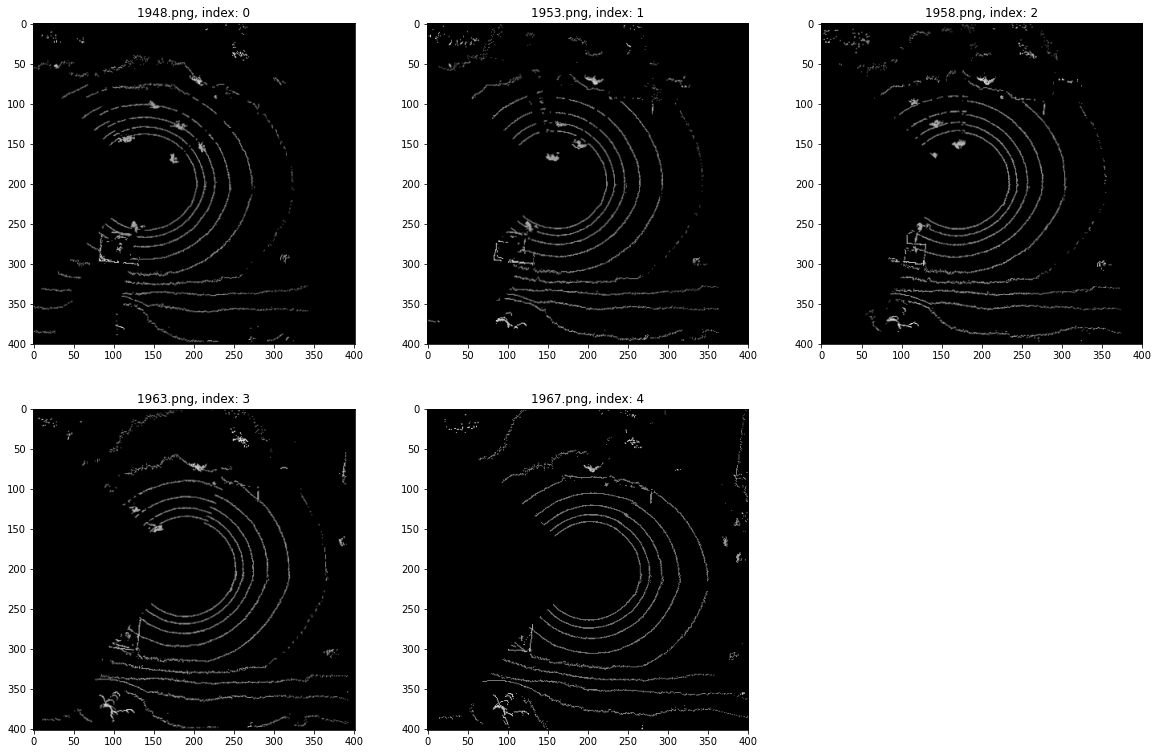

In [7]:
from lidar_helper import visualize_lidar_stack

# visualize mode returns lidar stack
# and the corresponding file names
lidar_stack = sample[0][0]
lidar_fnames = sample[0][1]

cprint(f'index: {idx}', color='green', attrs=['bold'])
visualize_lidar_stack(lidar_stack=lidar_stack, file_names=lidar_fnames)

### Visualize Future Joystick in Table View

In [8]:
joystick = sample[1]

joy_df = pd.DataFrame(data=joystick, columns=['linear_x', 'linear_y', 'angular_z'])
joy_df

,linear_x,linear_y,angular_z
0,1.6,0.000000,-0.000000
1,1.6,0.000000,-0.000000
2,1.6,0.000000,-0.000000
3,1.6,0.000000,-0.000000
4,1.6,0.000000,-0.000000
...,...,...,...
295,1.6,-0.044777,-0.074496
296,1.6,-0.044777,-0.074496
297,1.6,-0.044777,-0.074496
298,1.6,-0.044777,-0.074496


### Display Some Joystick Stats

In [9]:
linear_x_max = joy_df['linear_x'].max()
linear_x_min = joy_df['linear_y'].min()
linear_x_avg = joy_df['linear_x'].mean()

linear_y_max = joy_df['linear_y'].max()
linear_y_min = joy_df['linear_y'].min()
linear_y_avg = joy_df['linear_y'].mean()

angular_z_max = joy_df['angular_z'].max()
angular_z_min = joy_df['angular_z'].min()
angular_z_avg = joy_df['angular_z'].mean()

In [10]:
joy_stats = {"linear_x": [linear_x_max, linear_x_min, linear_x_avg], "linear_y": [
    linear_y_max, linear_y_min, linear_y_avg], "angular_z": [angular_z_max, angular_z_min, angular_z_avg]}

joy_stats_df = pd.DataFrame(data=joy_stats, columns=[
                            'linear_x', 'linear_y', 'angular_z'], index=['max', 'min', 'avg'])

joy_stats_df

,linear_x,linear_y,angular_z
max,1.600000,0.000000,0.720274
min,-0.044777,-0.044777,-0.360065
avg,1.600000,-0.019254,-0.003828
